In [39]:
import pandas as pd 
import pickle

In [58]:
%reload_ext autoreload
%autoreload 2
from utilities import *
from visuals import *


### Step 0: Load stability dictionaries created in the non cooperative game notebook

In [88]:
payoffs = load_data("../model/data/processed/50yr_all2.pickle") 

In [86]:
payoffs = add_multiple_baselines(payoffs, 'Status Quo')
payoffs = add_multiple_baselines(payoffs, 'Zero Baseline')
disagreement_points = payoffs[payoffs.index.isin(['policy98', 'policy7', 'policy87', 'policy85', 'Susqstatusquo', 'Get nothing'])]

In [77]:
disagreement_points.index.rename('decision', inplace = True)
disagreement_points = disagreement_points.sort_values(by = 'decision')
plot_selected_parcoords(disagreement_points, payoffs, f'stability/01_disagreement_points')

In [95]:
example_stability = payoffs[payoffs.index.isin(['policy13', 'policy19', 'policy87'])]
# flood risk, hydropower, Baltimore
plot_selected_parcoords(example_stability, payoffs, 'stability/04_example_stable_solutions', colorscale = ['green', 'green', 'lightgrey'])

In [96]:
example_stability = payoffs[payoffs.index.isin(['policy3', 'policy32', 'policy87'])]
# flood risk, hydropower, Baltimore
plot_selected_parcoords(example_stability, payoffs, 'stability/04_example_stable_solutions', colorscale = ['green', 'green', 'lightgrey'])

In [91]:
example_stability = payoffs[payoffs.index.isin(['policy54', 'policy6', 'policy85'])]
# flood risk, hydropower, Baltimore
plot_selected_parcoords(example_stability, payoffs, 'stability/04_example_stable_solutions')

In [21]:
stable_decisions = pd.DataFrame(columns = ['policies', 'stability', 'baseline', 'actors'])
with open('../output/processed/stability_analysis_7player_round4_diminishing', "rb") as f:
    game_7 = get_stable_df_from_dict(pickle.load(f))
    game_7['nr_actors'] = 7
    stable_decisions = stable_decisions.append(game_7)
with open('../output/processed/stability_analysis_6player_round4_diminishing', "rb") as f:
    game_6 = get_stable_df_from_dict(pickle.load(f))
    game_6['nr_actors'] = 6
    stable_decisions = stable_decisions.append(game_6)
with open('../output/processed/stability_analysis_5player_round5_diminishing', "rb") as f:
    game_5 = get_stable_df_from_dict(pickle.load(f))
    game_5['nr_actors'] = 5
    stable_decisions = stable_decisions.append(game_5)
with open('../output/processed/stability_analysis_5player_round10_diminishing', "rb") as f:
    game_4 = get_stable_df_from_dict(pickle.load(f))
    game_4['nr_actors'] = 4
    stable_decisions = stable_decisions.append(game_4)
with open('../output/processed/stability_analysis_3player_round10', "rb") as f:
    game_3 = get_stable_df_from_dict(pickle.load(f))
    game_3['nr_actors'] = 3
    stable_decisions = stable_decisions.append(game_3)

In [22]:
baselines = list(stable_decisions['baseline'].unique())

In [23]:
utility_function = get_marginal_utility_of_df

payoffs = load_data("../model/data/processed/50yr_all2.pickle")


#statusquo_payoffs = get_all_fairness_metrics((add_baseline(load_data("../model/data/processed/50yr_all2.pickle"), 'Status Quo')), utility_function)

In [24]:
actors = ['hydropower_revenue', 'atomic_power_plant_discharge', 'baltimore_discharge' ,'chester_discharge', 'recreation', 'environment', 'flood_risk']

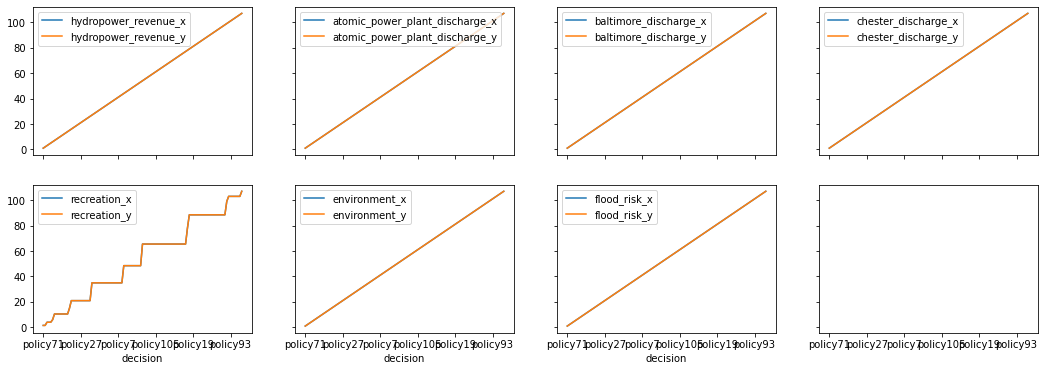

In [26]:
import matplotlib.pyplot as plt
utilities = get_marginal_utility_of_df(payoffs).rank()
ranks = payoffs.rank()
import seaborn as sns
df = ranks.merge(utilities, on = 'decision')

fig = plt.figure(figsize = (18,6))
axes = fig.subplots(nrows = 2, ncols = 4, sharex = True, sharey = True )

for idx, actor in enumerate(actors):
    df = df.sort_values(by = actor +'_x')
    ax = axes.flatten() 
    df[[actor+'_x', actor+'_y']].plot(ax = ax[idx])
#plt.plot(ranks.decision, ranks['hydropower_revenue'])
#sns.scatterplot(utilities['hydropower_revenue'], ranks['hydropower_revenue'])

In [27]:
notable_policies = {'policy2': 'chester', 'policy30': 'baltimore', 'policy37':'hydropower', 'policy64': 'atomicpower', 'baseline':'status_quo', 'policy98': 'utilitarian', 'policy85': 'fallback', 'policy7': 'egalitarian'}

notable_policies = {'policy2': 'chester', 'policy30': 'baltimore', 'policy37':'hydropower', 'policy64': 'atomicpower', 'baseline':'status_quo', 'policy85': 'utilitarian', 'policy85': 'fallback', 'policy87': 'egalitarian'}

In [28]:
payoffs = payoffs.reset_index()
payoffs = add_baseline(payoffs, 'Status Quo')
payoffs['policies'] = payoffs['decision'].map(notable_policies)

#statusquo_payoffs = statusquo_payoffs.reset_index()
#statusquo_payoffs['policies'] = statusquo_payoffs['decision'].map(notable_policies)
payoffs['policies'] = payoffs['policies'].fillna(payoffs['decision'])
#statusquo_payoffs['policies'] = statusquo_payoffs['policies'].fillna(payoffs['decision'])


In [29]:
#statusquo_stable = stable_decisions[stable_decisions['baseline']=='status_quo'].merge(statusquo_payoffs, on = 'policies')
stable = stable_decisions[~(stable_decisions['baseline']=='status_quo')].merge(payoffs, on = 'policies')

In [30]:
presence = ['hydropower_revenue_present',
       'atomic_power_plant_discharge_present', 'baltimore_discharge_present',
       'chester_discharge_present', 'recreation_present', 'environment_present', 'flood_risk_present']

#df = others_stable.append(statusquo_stable)
#df = df.reset_index(drop=True)

In [31]:
df = stable

for index, row in df.iterrows():
    for idx, actor in enumerate(actors):
        if actor in row['actors']:
           df.loc[index, presence[idx]] = 'Yes'
        else:
            df.loc[index,presence[idx]] = 'No'      


In [38]:
df[df['baseline']=='Status Quo']

,policies,stability,baseline,actors,nr_actors,decision,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,...,flood_risk,hydropower_revenue_present,atomic_power_plant_discharge_present,baltimore_discharge_present,chester_discharge_present,recreation_present,environment_present,flood_risk_present,gini_index,utility
2782,policy54,1,Status Quo,"['baltimore_discharge', 'chester_discharge', '...",5,policy54,44.587546,0.675221,0.453724,0.602237,...,-1.679011,No,No,Yes,Yes,Yes,Yes,Yes,NaN,NaN
2787,policy54,1,Status Quo,"['hydropower_revenue', 'atomic_power_plant_dis...",4,policy54,44.587546,0.675221,0.453724,0.602237,...,-1.679011,Yes,Yes,No,No,No,Yes,Yes,NaN,NaN
2790,policy54,1,Status Quo,"['hydropower_revenue', 'atomic_power_plant_dis...",4,policy54,44.587546,0.675221,0.453724,0.602237,...,-1.679011,Yes,Yes,No,No,No,Yes,Yes,NaN,NaN
2792,policy54,1,Status Quo,"['hydropower_revenue', 'atomic_power_plant_dis...",4,policy54,44.587546,0.675221,0.453724,0.602237,...,-1.679011,Yes,Yes,No,No,No,Yes,Yes,NaN,NaN
2794,policy54,1,Status Quo,"['hydropower_revenue', 'atomic_power_plant_dis...",4,policy54,44.587546,0.675221,0.453724,0.602237,...,-1.679011,Yes,Yes,No,No,No,Yes,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,policy70,1,Status Quo,"['hydropower_revenue', 'chester_discharge', 'r...",3,policy70,44.992208,0.566901,0.220486,0.316137,...,-1.712256,Yes,No,No,Yes,Yes,No,No,NaN,NaN
5659,policy10,1,Status Quo,"['hydropower_revenue', 'baltimore_discharge', ...",3,policy10,44.744131,0.594205,0.276593,0.361062,...,-2.807830,Yes,No,Yes,No,No,Yes,No,NaN,NaN
5661,policy107,1,Status Quo,"['hydropower_revenue', 'baltimore_discharge', ...",3,policy107,44.760593,0.594232,0.120298,0.351448,...,-1.960373,Yes,No,Yes,No,No,Yes,No,NaN,NaN
5662,policy107,1,Status Quo,"['hydropower_revenue', 'baltimore_discharge', ...",3,policy107,44.760593,0.594232,0.120298,0.351448,...,-1.960373,Yes,No,Yes,No,No,Yes,No,NaN,NaN


In [32]:
df.to_excel('../output/processed/stable_decisions_diminishing.xlsx')

In [33]:
linear = pd.read_excel(f'../output/processed/stable_decisions.xlsx')
diminishing = pd.read_excel(f'../output/processed/stable_decisions_diminishing.xlsx')

linear.drop(columns = 'Unnamed: 0', inplace = True)
linear['baseline'].replace({'utilitarian': 'policy98', 'egalitarian': 'policy7', 'fallback':'policy85'}, inplace = True)
diminishing.drop(columns = 'Unnamed: 0', inplace = True)
diminishing['baseline'].replace({'utilitarian': 'policy85', 'egalitarian': 'policy87'}, inplace = True)

df = diminishing.append(linear)
df.to_excel('../output/processed/stability_decisions_all!.xlsx')

In [ ]:
#stable_decisions.to_excel('../output/processed/stable_decisions.xlsx')